### <p style="text-align: right;"> &#9989; Andrew Koren</p>

chD49u557PVmZ6KXDz/F9ykpAOBFEIfUsJVoLQo9qDM=

# PHY480 Midterm, Spring 2025

**This Jupyter notebook with your answers is due at the end of the class, 11:40 am, Thu, Feb 27, 2025.**

There are in total **7 problems** worth **45 points**.

You can use your lecture notes and the Jupyter notebooks developed during the classes, such as examples given in class, in-class assignments and homeworks. Feel free to copy/paste any code you need from there. Make sure you present an explanation or numerical evidence that justifies your answer.


In [1]:
import numpy as np

## Numerical representation of derivatives

**Problem 1 (5 points).** Compute the derivative of $f(x)=\sin(x^2)$ at $x=10^4$ using the central finite difference for different steps sizes $\varepsilon=1/10^k$, $k=1,2,\dots,16$. Print out the results for all $k$ and compare with the exact result. Explain what you observe.

In [2]:
# central finite difference
# Input:
# fun -- function to be derived (scalar output)
# x -- at which point
# dim -- input number to vary
# eps -- step size for approximations
def df_central( fun, x, dim=None, eps=0.001, *args): 

    if dim==None:
        return (fun(x+eps/2, *args) - fun(x-eps/2, *args))/2

    x = list(x)
    x[dim] += eps/2 # i'm sure messing with x won't cause any problems
    f1 = fun(x, *args)
    x[dim] -= eps
    f2 = fun(x, *args)
    x[dim] += eps/2 # just in case
    return (f1 - f2)/eps

def grad( fun, r, eps=0.001 , *args):
    grad = []
    for dim in range(len(r)):
        partial = df_central(fun, r, dim, eps, *args)
        grad.append(partial)
    return np.array(grad)

In [3]:
from numpy import sin
testf = lambda x: sin(x**2)

k = np.arange(1,17, dtype=np.float64)
eps = 1/(10**k)

df_central(testf, x=10**4, eps=eps)

array([-3.02400633e-01,  1.84017524e-01,  1.97689288e-01, -3.05778012e-01,
       -3.62779729e-02, -3.63379228e-03, -3.63385765e-04, -3.63391240e-05,
       -3.63337092e-06, -3.57380746e-07, -3.79040185e-08,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

Explain what you observe here.


In [4]:
import sympy as sy

x = sy.symbols('x')
sy.diff(sy.sin(x**2), x).replace(x, 10**4)

20000*cos(100000000)

For the few largest epsilon values, the sign of the result flips as the central finite difference is evaluated at closer points.

## Iterative formula for 4th root (Newton root finding method)

**Problem 2 (5 points).** Derive an iterative formula to calculate $\sqrt[4]{a}$ for given $a$. Program this formula and calculate $\sqrt[4]{2}$, $\sqrt[4]{20}$, $\sqrt[4]{200}$ and $\sqrt[4]{2000}$. Compare with python built-in method. 

In [5]:
a_list = np.array([2, 20, 200, 2000])
rt_a = [a**(1/4) for a in a_list]
rt_a



[1.189207115002721, 2.114742526881128, 3.7606030930863934, 6.68740304976422]

We can use x^4 - a = 0 and x^4 will be our result

In [6]:


def root_newton_raphson( fun, x0, dfun=None, tol=1e-4, max_iter=100 ):
    xn = [x0]
    i = 0
    status = 1

    if dfun==None:
        def dfun(x):
            return df_central(fun, x)

    while abs(fun(xn[-1])) > tol or i == max_iter:
        if dfun(xn[-1]) == 0:
            i = max_iter

        xn1 = xn[-1] - fun(xn[-1])/dfun(xn[-1])
        xn.append(xn1)
        i += 1
        break
    
    if i != max_iter:
        status = 0

    return status, i, xn[-1], fun(xn[-1]), xn


xa = lambda x: x**4-2
root_newton_raphson(xa, x0=1)

(0, 1, 500.999875000076, 63001439123.31125, [1, 500.999875000076])

This didn't quite work, sorry!

## Optimization

**Problem 3 (5 points).** Consider a function 

$$f(x)=(x-3)(x-4)(x-5).$$

It has a local minimum and a local maximum. Let $x_0=3.7$ be a starting point. Compute explicitly (i.e. write code below, do not call the gradient descent or Newton-Raphson subroutines) to what next point:

- the gradient descent algorithm with step size $\alpha=1$ will move after one step,
- the Newton _optimization_ algorithm will move after one step.

Analyze the results and explain your observations.


In [7]:
def f( x ):
    return (x-3)*(x-4)*(x-5)

x0 = 3.7

# YOUR CODE

def minimize_gradient_descent(fun, x0, dfun=None, alpha=0.01, tol=1e-4, max_iter=100, maxima = False, eps=0.001):
    status = 0
    i = 0

    if dfun==None:
        def dfun(x):
            return df_central(fun, x, eps=eps)
        
    steps = [x0]
    while abs(dfun(steps[-1])) > tol and i != max_iter:
        steps.append(steps[-1] - alpha*dfun(steps[-1])*(-1)**(maxima)) # negative dfun if flipped
        i += 1
        break

    if i == max_iter:
        status = 1

    if steps[-1] == np.inf or steps[-1] == -np.inf:
        status = 2 # out of bounds error

    return status, steps[-1], i, steps

minimize_gradient_descent(f, x0, alpha=1)[-1]

[3.7, 3.700364999875]

In [8]:
def root_newton_raphson( fun, x0, dfun=None, tol=1e-4, max_iter=100 ):
    xn = [x0]
    i = 0
    status = 1

    if dfun==None:
        def dfun(x):
            return df_central(fun, x)

    while abs(fun(xn[-1])) > tol or i == max_iter:
        if dfun(xn[-1]) == 0:
            i = max_iter
            break

        xn1 = xn[-1] - fun(xn[-1])/dfun(xn[-1])
        xn.append(xn1)
        i += 1
        break
    
    if i != max_iter:
        status = 0

    return status, i, xn[-1], fun(xn[-1]), xn

root_newton_raphson(f, x0)[-1]

[3.7, 751.6454616249428]

Gradient descent takes one small step in the direction indicated by the gradient, while the newton-raphson assumes the curve is a straight line and jumps straight to the end. Since the curve is certainly not straight, newton ends up far away, while gradient descent is a little big closer to the actual value.

## Numerical integration

**Problem 4 (10 points).** Use Simpson's rule (that you coded) to compute the electric field from a uniformly charged ring (in two dimensions) with the center at the origin, total charge $Q=-3$ and the radius $R=1.2$ at the point $(2.5,1.5)$. (Consult homework 2.)


We should only need to convert our line code to instead use a ring

$ c = 2\pi r$ <br>

Charge density $Q' = Q/c$

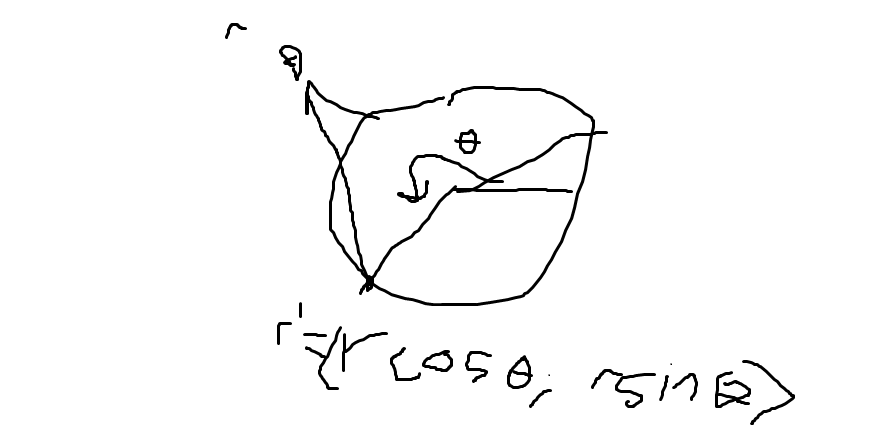

In [9]:
from numpy import pi, cos, sin

def integrand_charged_rod( thp, r, Q=1, radius=1):

    # unpack x,y
    x = r[0]
    y = r[1]

    xp = radius * cos(thp)
    yp = radius * sin(thp)

    return Q/(2*radius) * 1/(np.sqrt((x-xp)**2 + (y-yp)**2))

Now we need only change our parameters around inside the functions

In [10]:
def integrate_simpson( fun, a, b, N, *args):
    if N % 2 == 1:
        N -= 1 # makes steps but that's okay

    h = (b-a)/N
    s = fun(a, *args) + fun(b, *args)

    for k in range(1,N,2):
        s += 4*fun(a+k*h, *args)
    for k in range(2, N-1,2):
        s += 2*fun(a+k*h, *args)
    
    return s*h/3

def electric_pot_rod_simpson( r, Q=1, radius=1 ):
    
    N = 301 # number of points for Simpson's rule

    phi = integrate_simpson(integrand_charged_rod, 0, 2*pi, N, r, Q, radius)

    return phi

def electric_field_rod_finite_diff( r, Q=1, radius=1 ):
    
    # the field diverges close to the rod, therefore return 0
    # if r=(x,y) is too close
    if np.linalg.norm(r) < radius*1.05:
        return np.zeros(2)

    # step for the central finite difference, may be adjusted
    h = 1e-5
    
    E = -grad(electric_pot_rod_simpson, r, h, Q, radius) #grad defined in pt1
    
    return E

In [11]:
# the grid of points on x and y
a = 3 # x-range [-a,a]
b = 3 # y-range [-b,b]
nx = 13 # how many points on x
ny = 13 # how many points on y

# parameters of the rod are automatically inputted
Q = 1
d = 1
y0 = 0

X = np.linspace(-a, a, nx)
Y = np.linspace(-b, b, ny)

x, y = np.meshgrid(X, Y)
R = np.column_stack((x.ravel(), y.ravel()))
dR = np.array([electric_field_rod_finite_diff(r, Q=-3, radius=1.2) for r in R])

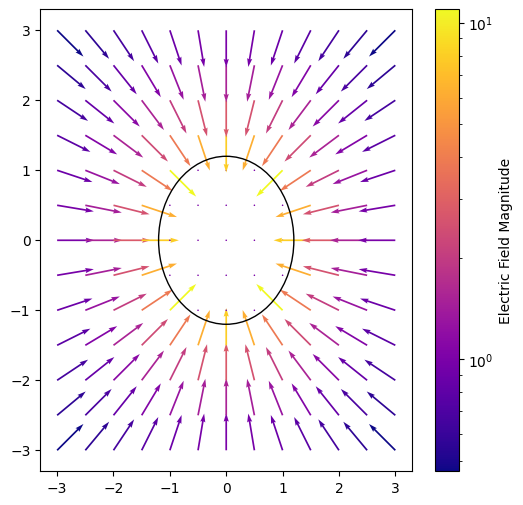

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as patches

mag = np.sqrt(dR[:,0]**2+dR[:,1]**2)
mag[mag==0] = 1
dR_norm = dR/np.column_stack((mag, mag))

ax = plt.figure(figsize=(6,6)).add_subplot()
Efield = ax.quiver(R[:,0], R[:,1], dR_norm[:,0], dR_norm[:,1], mag, scale=10, norm=LogNorm(), cmap='plasma')

circle = patches.Circle((0, 0), 1.2, edgecolor='black', fill=False)
ax.add_patch(circle)

cbar = plt.colorbar(Efield)
cbar.set_label("Electric Field Magnitude")

## Methods for ordinary differential equations

**Problem 5 (10 points).** Consider a Runge-Kutta method with the Butcher tableau given below. Empirically determine its global order of accuracy.


In [13]:
s = 5
a = np.zeros( (s,s) )
b = np.zeros( s )
c = np.zeros( s )

a[1,0] = 1/4
a[2,0] = -3/4
a[2,1] = 5/4
a[3,0] = -337/108
a[3,1] = 455/108
a[3,2] = -23/54
a[4,0] = 761/180
a[4,1] = -179/36
a[4,2] = 161/180
a[4,3] = 3/5
b[0] = 29/132
b[1] = 5/132
b[2] = 23/132
b[3] = 3/11
b[4] = 13/44
c[1] = 1/4
c[2] = 1/2
c[3] = 2/3
c[4] = 3/4

print(a)
print(b)
print(c)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.25        0.          0.          0.          0.        ]
 [-0.75        1.25        0.          0.          0.        ]
 [-3.12037037  4.21296296 -0.42592593  0.          0.        ]
 [ 4.22777778 -4.97222222  0.89444444  0.6         0.        ]]
[0.21969697 0.03787879 0.17424242 0.27272727 0.29545455]
[0.         0.25       0.5        0.66666667 0.75      ]


We'll check this butcher tableau against a simple harmonic oscillator

In [14]:
# Runge-Kutta integrator with a specified Butcher tableau
# Input:
# rhs -- the right-hand-side function f(x,y)
# y0 -- the initial value y(x0)=y0, it must be a NumPy array or a list
#       (even in the scalar case it must be defined as array or list with one element)
# x0 -- initial integration point on x
# xf -- final integration point on x (i.e. we are finding y(x) in [x0,xf] range)
# h -- step size
# s -- number of Runge-Kutta stages
# a,b,c -- Butcher tableau
# args -- additional arguments (e.g. parameters) for f(x,y)
# Output:
# status -- =0 on success
# y -- the last point y(xf)
# xlist -- list of all x points during the integration
# ylist -- y(x) at the x points above
def integrate_ode_rungekutta( rhs, y0:np.array, x0, xf, h, s, a, b, c, args=None):

    # set the dimension of the y vector
    nd = len(y0)
    
    # k_i storage
    kf = np.zeros( (s,nd) )
    
    # number of steps, may need one more if xf-x0 is not
    # an integer multiple of h
    nf = ( xf - x0 ) / h
    n = int(nf)

    # initialization
    xlist = [x0]
    ylist = [y0]
    status = 1
    
    y = y0.copy()

    # integration
    for step in range(n+1): #integration steps
        if step == n:
            if xlist[-1] == xf: # last step verification
                break
            else:
                h = xf - xlist[-1]

        for i in range(s): #rk steps
            yi = y + h * sum(a[i,j] * kf[j] for j in range(i)) 
            ki = rhs(xlist[-1]+h*c[i], yi, *args)
            y += h * b[i] * ki
        xlist.append(xlist[-1]+h)
        ylist.append(y.copy())

    if xlist[-1] == xf:
        status = 0   
    
    return status, y, xlist, ylist


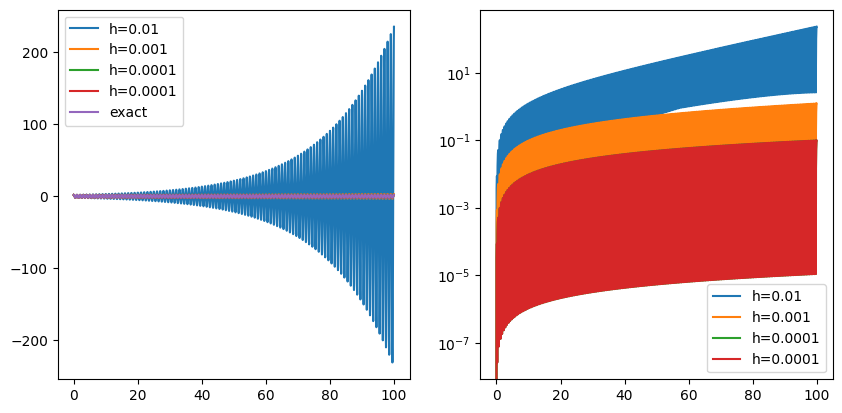

In [15]:
def sho_exact(t, r0, omega): # v0 = 0
    return r0*cos(omega*t)

def rhs_ho( x, y, omega=1.0 ):
    
    r = y[0]
    v = y[1]
    
    return np.array( [v, -omega**2*r] )

# frequency -- multiple of pi
omega=2*np.pi

# integrate from 0 to xf
x0 = 0.
xf = 100.

# the initial condition r0=2, v=0
y0 = np.array( [ 2., 0. ] )

# step size
hlist = [0.01, 0.001, 0.0001, 0.0001]

fig, (ax0, ax1) = plt.subplots(1, 2)
fig.set_figwidth(10)
for h in hlist:
    status, y, xlist, ylist = integrate_ode_rungekutta( rhs_ho, y0, x0, xf, h, s, a, b, c, args=[omega])
    ax0.plot(xlist, np.array(ylist).T[0], label=f'h={h}')
    ax1.plot(xlist, np.abs(np.array(np.array(ylist).T[0]) - sho_exact(np.array(xlist), y0[0], omega)), label=f'h={h}')


ax0.plot(xlist, sho_exact(np.array(xlist), y0[0], omega), label='exact')
ax1.set_yscale('log')
ax0.legend()
ax1.legend();

It appears the error scales with $1/h$, but also looses accuracy over time

## Numerical linear algebra


**Problem 6 (5 points).** Solve a linear system $Ax=b$ with $A$ and $b$ given below with your implementation of Gaussian elimination algorithm.


In [20]:
A = np.array( [ \
               [0,2,1],\
               [3,5,4],\
               [6,7,8],\
            ], dtype=np.float64 )

b = np.array( [7,25,44], dtype=np.float64 )

In [21]:
def backsub(U,bs):
    n = bs.size
    xs = np.zeros(n)
    for i in reversed(range(n)):
        val = 0.
        for j in range(i+1,n):
            val += U[i,j]*xs[j]
        xs[i] = (bs[i] - val)/U[i,i]
    return xs

def gauelim_pivot(inA,inbs):
    A = np.copy(inA)
    bs = np.copy(inbs)
    n = bs.size

    for j in range(n-1):
        k = np.argmax(np.abs(A[j:,j])) + j
        if k != j:
            A[j,:], A[k,:] = A[k,:], A[j,:].copy()
            bs[j], bs[k] = bs[k], bs[j]

        for i in range(j+1,n):
            coeff = A[i,j]/A[j,j]
            A[i,j:] -= coeff*A[j,j:]
            bs[i] -= coeff*bs[j]

    xs = backsub(A,bs)
    return xs

gauelim_pivot(A, b)

array([1., 2., 3.])

If this looks familiar, I used the textbook solution when doing Day10_ICA

**Problem 7 (5 points).** Consider a $4\times 4$ matrix below. Without explicitly computing LU decomposition, can you tell if there is anything special about the diagonal of the $L$ or $U$ part?


In [22]:
A = np.array( [ \
    [  1, -1, -1,  0 ], \
    [ -1, -1, -1,  1 ], \
    [ -1, -1, -1,  1 ], \
    [  0,  1,  1,  1 ] \
              ])

We know the diagonal of L will be ones, and the diagonal of U will not be all zeros because it is not singular

&#169; Copyright 2025,  Michigan State University Board of Trustees